In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import pprint
import os

In [5]:
df=pd.read_csv(r"C:\Users\devan\OneDrive\Desktop\ML Datasets and Notes\breast_cancer_data.csv")

In [6]:
# pandas profiling
# from ydata_profiling import ProfileReport
#
# profile = ProfileReport(df)
# profile.to_file("output_c247.html")


In [7]:
print(df.info())
print(df.describe())
print(df.isnull().sum())
print(df.columns)
print(df.head())
print(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.shape

(569, 33)

In [9]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [10]:
df=df.drop(columns=['Unnamed: 32','id'],axis=1)

# EDA

In [11]:
df.columns


Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [12]:
print("unique values of Output label '\n'",df['diagnosis'].unique())

unique values of Output label '
' ['M' 'B']


In [13]:
# data distribution of target variable
# since categorical data we will use pie-plot
# lets check the proportion of the target variable
px.pie(df,'diagnosis',color='diagnosis')

    the data distribution of target variable is highly imbalanced

    there are 357 benign cases and 212 malignant cases
    majority of the cases are benign

    for imbalanced data it can create issue for accuracy of the model
    we need to balance the data
    we can use oversampling or undersampling to balance the data




In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

visually compare the distribution of each feature
for malignant tumours versus benign tumours

for each feature do its value tend to be different for malignant tumours versus benign tumours

In [15]:
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [16]:
for column in df.columns[:5]:
    fig=px.box(df,x=y,y=column,color='diagnosis')
    fig.show()

In [17]:
for column in X.columns[5:10]:
    fig=px.scatter(df,x=column,color=y)
    fig.show()

In [18]:
# encoding of categorical features

In [19]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


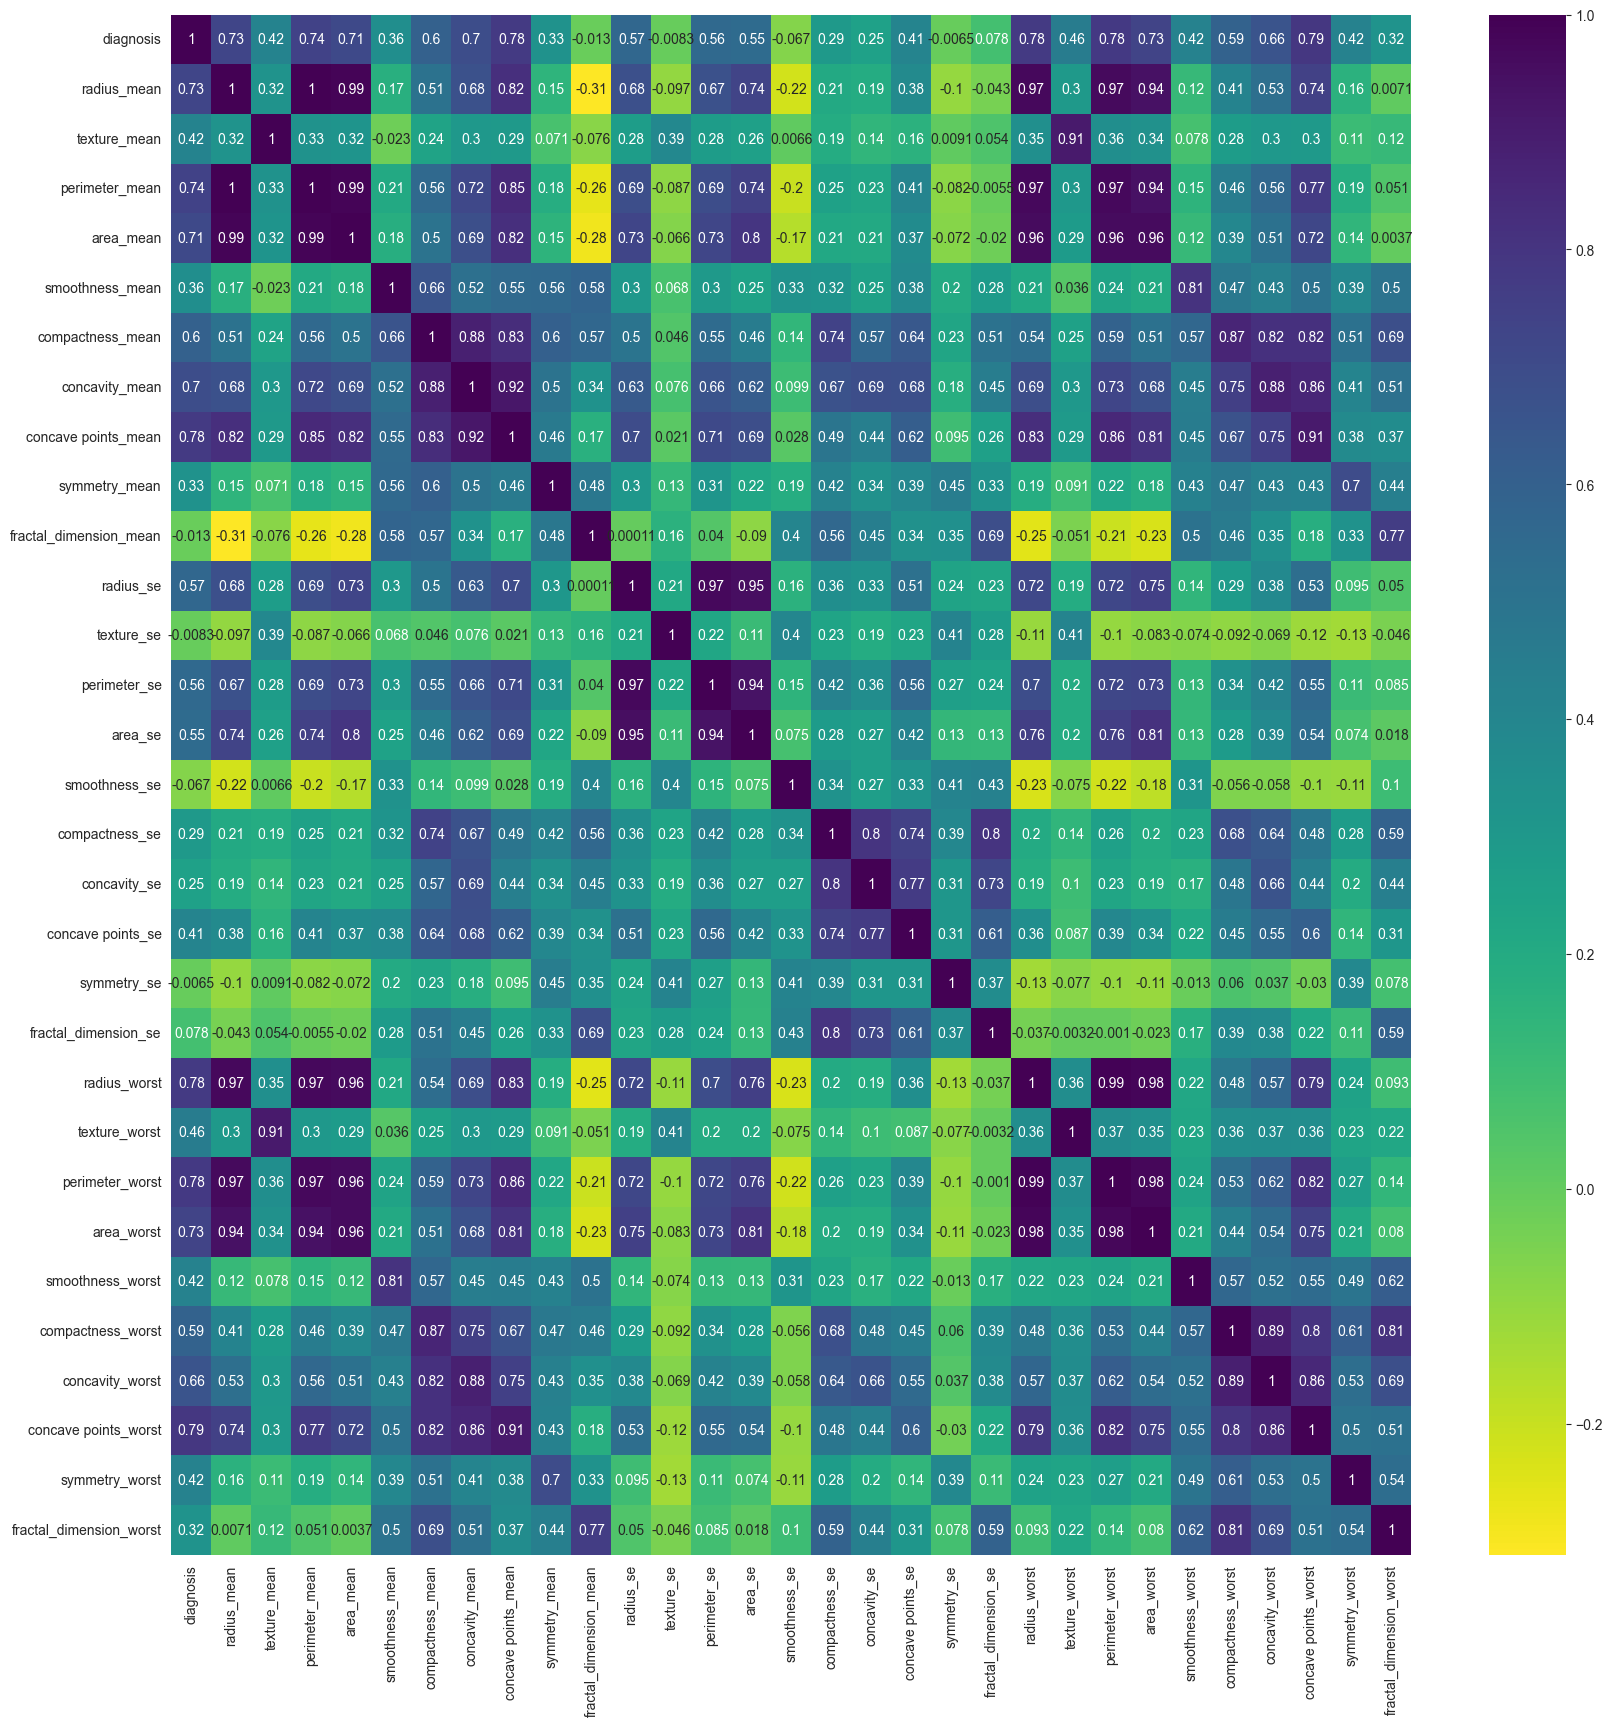

In [20]:
 # diagnosis : M or B :categorical

# encode : 1 or 0 :categorical

df['diagnosis'] = (df['diagnosis'] == 'M').astype(int)

# this line converts the categorical feature into numerical



 # setting M = 1  then B = 0



# take the correlation

corr = df.corr()

plt.figure(figsize = (20,20))

# heatmap

sns.heatmap(corr , cmap='viridis_r' , annot=True)

plt.show()

# correlation : -1 to 1






Axes(0.125,0.11;0.62x0.77)


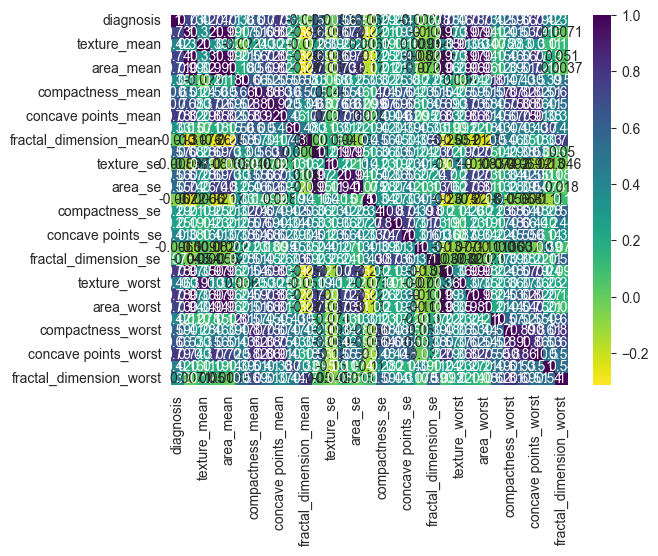

In [21]:
print(sns.heatmap(corr , cmap='viridis_r' , annot=True))





In [22]:
px.density_heatmap(df,x=,y='diagnosis')

SyntaxError: invalid syntax (3792703909.py, line 1)

<Axes: >

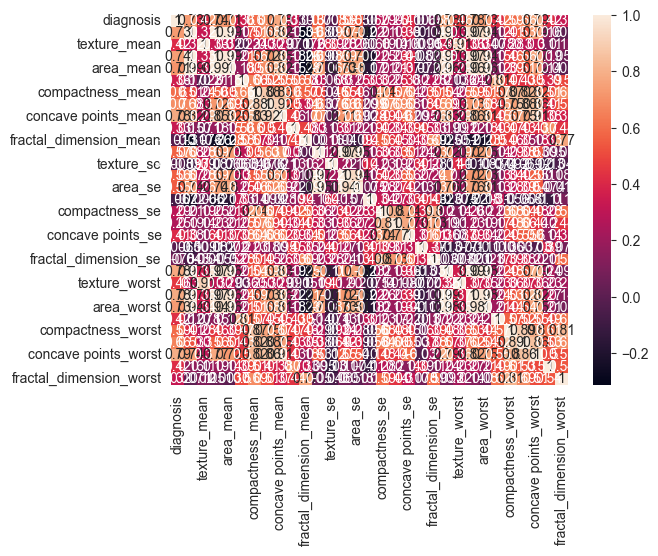

In [23]:
sns.heatmap(df.corr(),annot=True)

# Feature Selection

In [24]:
# We should remove the features that are not useful for the model

In [25]:
#get absolute correlation coefficients
corr_target = abs(corr['diagnosis'])

In [26]:
corr_target.sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
smoothness_se              0

In [27]:
# select better correlated features
# this is called filter method
relevant_features = corr_target[corr_target>0.4]
# it is the hyperparameter value

In [28]:
relevant_features

diagnosis               1.000000
radius_mean             0.730029
texture_mean            0.415185
perimeter_mean          0.742636
area_mean               0.708984
compactness_mean        0.596534
concavity_mean          0.696360
concave points_mean     0.776614
radius_se               0.567134
perimeter_se            0.556141
area_se                 0.548236
concave points_se       0.408042
radius_worst            0.776454
texture_worst           0.456903
perimeter_worst         0.782914
area_worst              0.733825
smoothness_worst        0.421465
compactness_worst       0.590998
concavity_worst         0.659610
concave points_worst    0.793566
symmetry_worst          0.416294
Name: diagnosis, dtype: float64

In [29]:
# list comprehension
names=[index for index,value in relevant_features.items()]

In [30]:

names.remove('diagnosis')

In [31]:
names

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'concave points_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst']

# Assign training data and test data

In [34]:
X=df[names]
y=df['diagnosis'].values.reshape(-1,1)

In [33]:
from sklearn.model_selection import train_test_split

In [38]:
y.shape

(569, 1)

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [44]:
# we need to scale/standardization the data
# Z-score normalization
def scale(X):
    '''

    :param X:numpy array of shape (n,d)
    :return: numpy array of shape (n,d)
    '''
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    X= (X-mean)/std
    return X
X=scale(X)

# Model Training

    we will start with all the examples at the root nodes
    then we will calculate the information gain/gini index for each feature
    then we will select the feature that has the highest information gain/gini index
    then we will split the data into two subsets
    then we will repeat the process until we have a leaf node

In [ ]:
class Node:
    '''
    A class to represent a node in a decision tree
    '''